# Bayesian Latent Model with Synthetic Data

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data.synthetic import Generator
from utils import helper_functions as hf

## Metadata for the Model

In [2]:
n = 200
d = [3, 4]
q = 2
min_len = 15
max_len = 20
max_time = 21

## Model

In [3]:
model = Generator(n, d, q, min_len, max_len, max_time)

## Meta Data

In [4]:
model_metadata = model.metadata
model_metadata

{'n': 200, 'd': [3, 4], 'q': 2, 'min_len': 15, 'max_len': 20, 'max_time': 21}

## Attributes

In [5]:
model_attributes = model.attributes

## Parameters

In [6]:
model_params = model.params
model_params

{'mu': [array([-0.77302306,  0.94896619,  0.45746927]),
  array([-0.96501946,  0.78314653, -0.43027767, -0.40204725])],
 'omega': [array([-0.29706439,  0.41521028,  0.5992092 ]),
  array([ 0.58406852, -0.35105881,  0.72942077, -0.10497474])],
 'w': [array([[ 0.29112371, -0.17080079],
         [ 0.41206202, -0.50670124],
         [-0.48801514, -0.95197729]]),
  array([[ 0.09645981, -0.28565601],
         [-0.77537595, -0.71620569],
         [-0.11008185,  0.46396045],
         [-0.07979754,  0.18548882]])],
 'v': [array([[-0.80254809, -0.39912713],
         [ 0.28171136, -0.3555841 ],
         [-0.62901172,  0.8343871 ]]),
  array([[-0.32657229, -0.09114436],
         [-0.62574445, -0.18232957],
         [-0.73579592, -0.92577937],
         [-0.83602434, -0.5731201 ]])],
 'sigma2': [1.27092080337477, 1.5452292637147478]}

## Time Sequence Plot

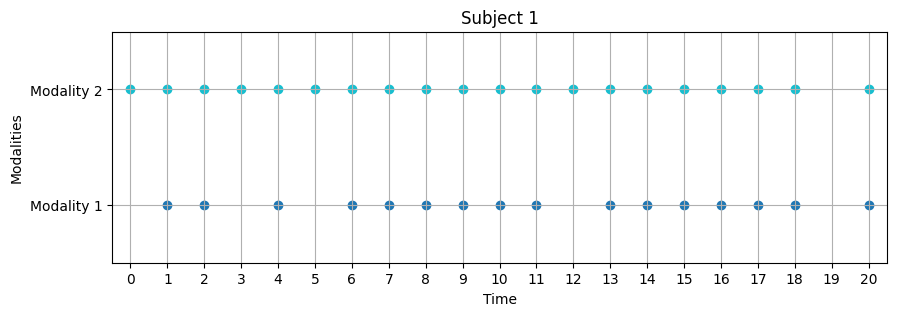

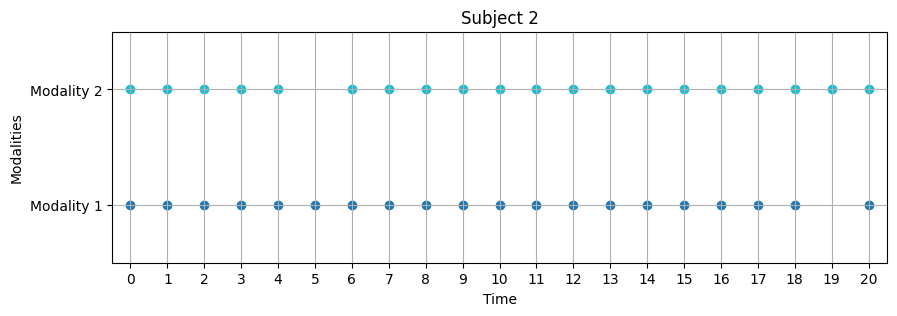

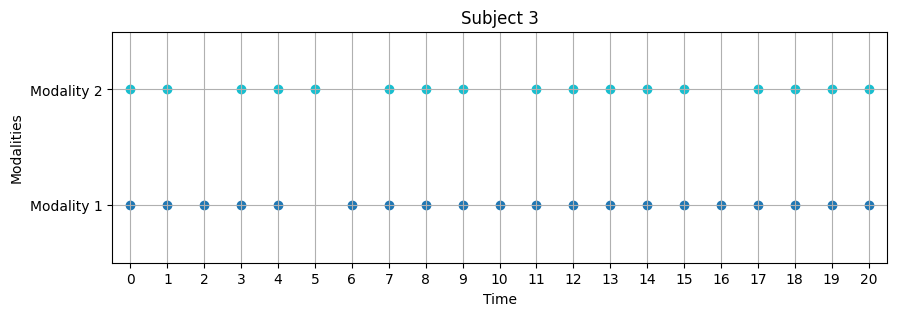

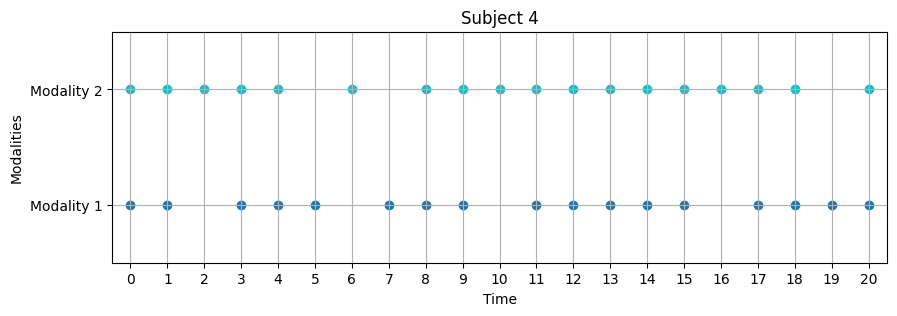

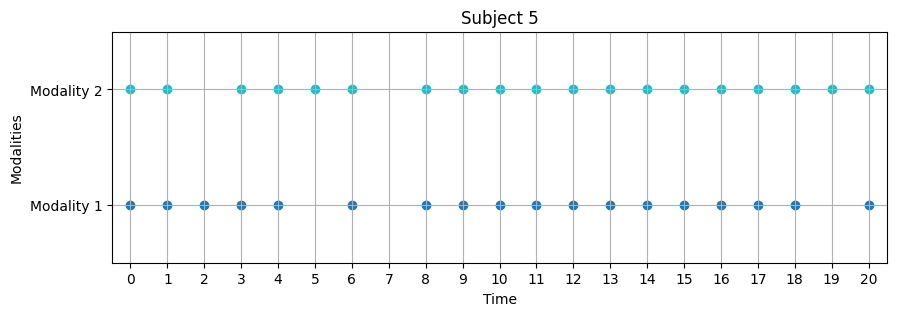

In [7]:
model.plot_t(subject_indices=[0, 1, 2, 3, 4])

## Data Generation

In [8]:
x_actual, y_actual = model.generate_data(gaussian=True)

In [9]:
d = model.metadata['d']
n = model.metadata['n']
t = model.attributes['t']
w_actual = model.params['w']
v_actual = model.params['v']
omega_actual = model.params['omega']
mu_actual = model.params['mu']
sigma2_actual = model.params['sigma2']

## Input Latent Data

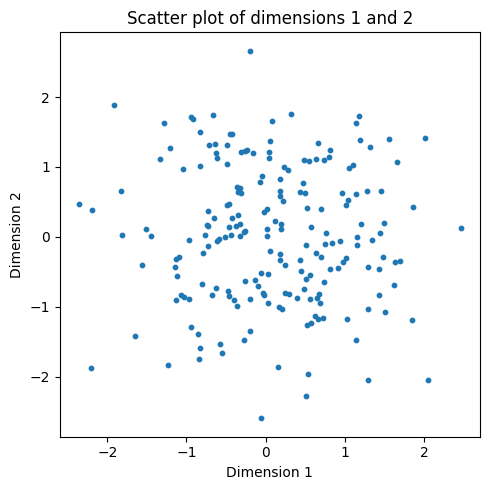

In [10]:
hf.plot_scatter_pairs_latent(x_actual)

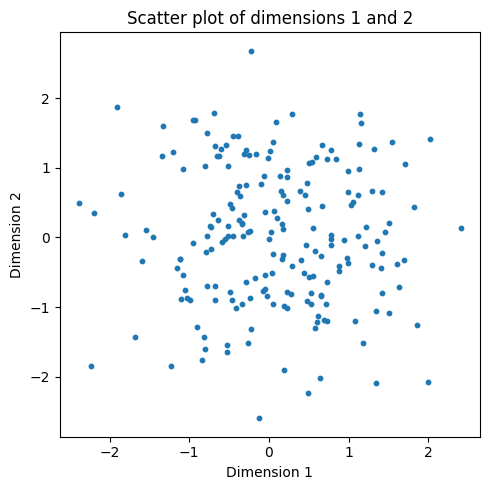

In [11]:
x_from_y, _, _ = hf.encode(y_actual, w_actual, v_actual, mu_actual, omega_actual, sigma2_actual, t, seed=None)
hf.plot_scatter_pairs_latent(x_from_y)

## Input Observed Data

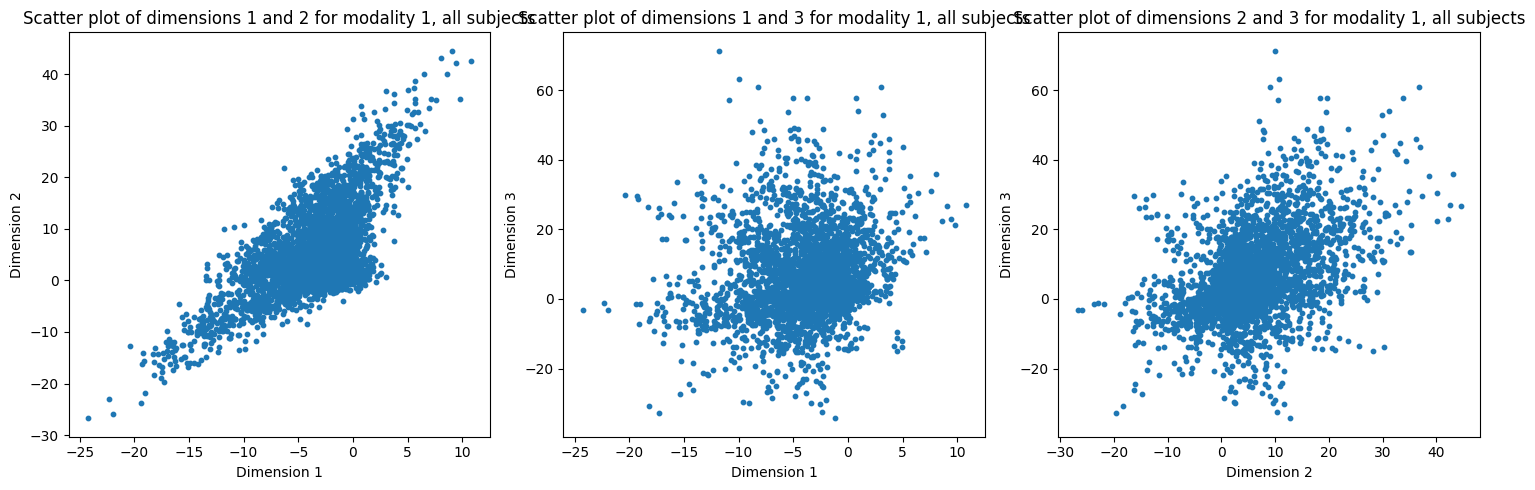

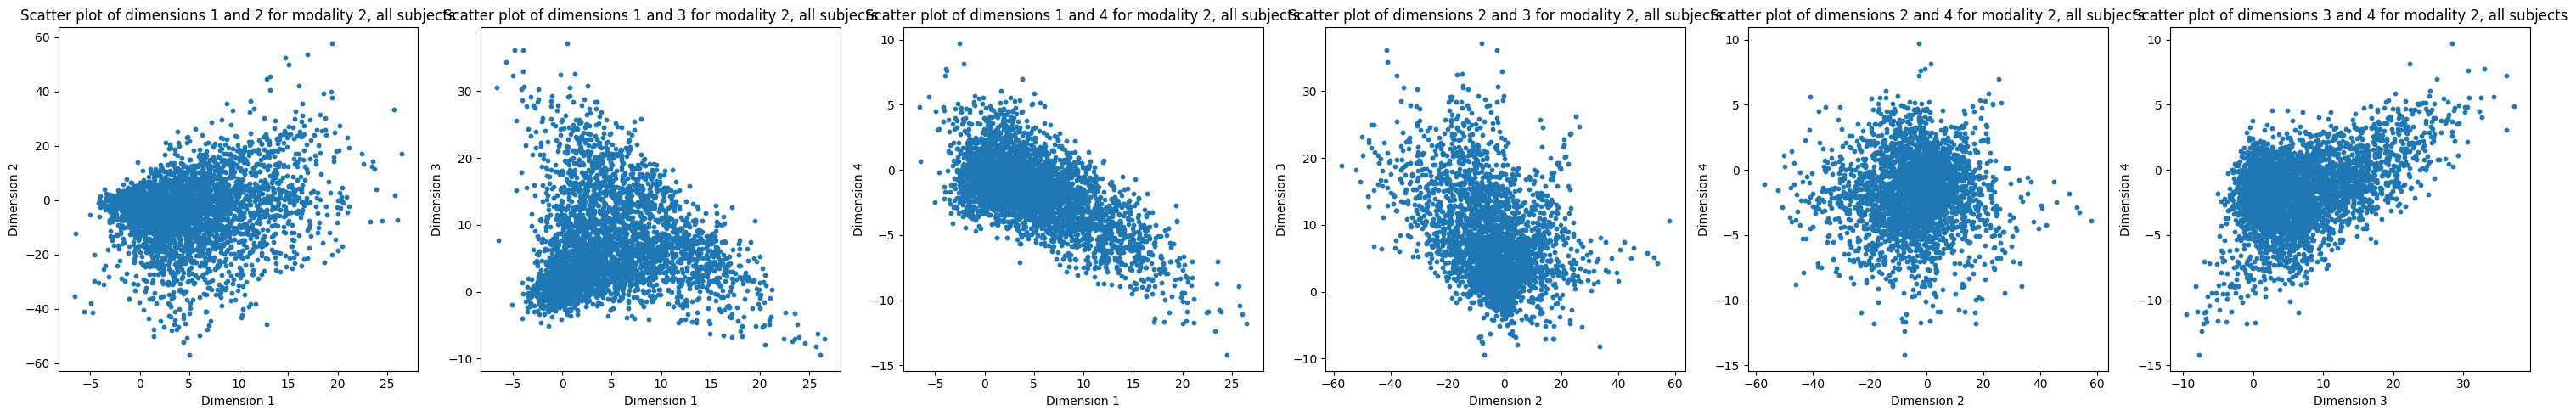

In [12]:
hf.plot_scatter_pairs_observed(y_actual)

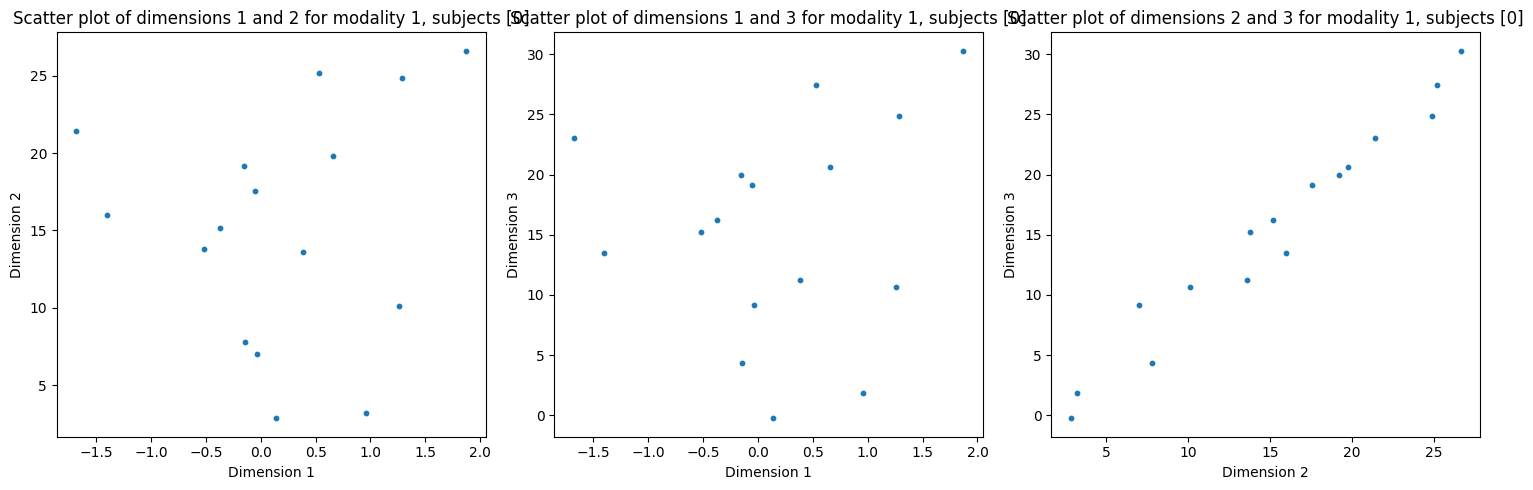

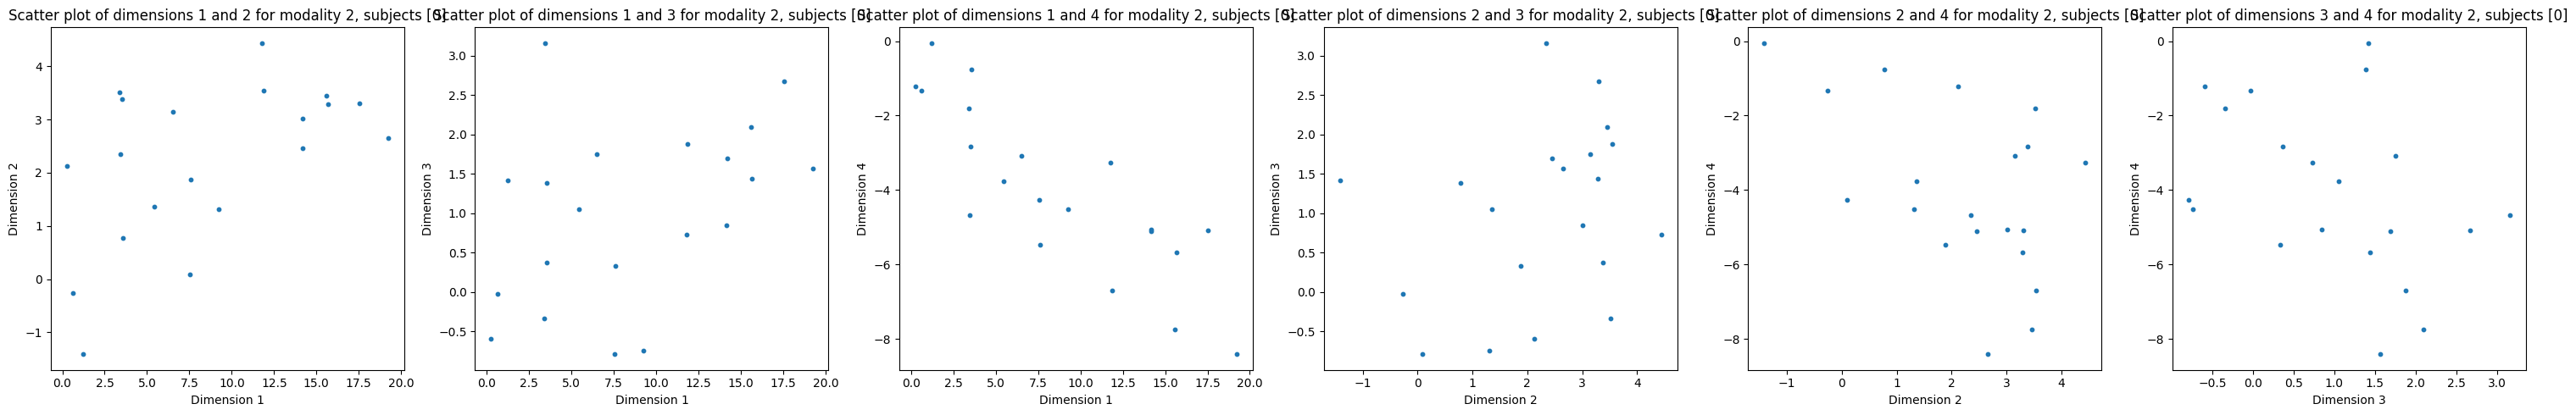

In [13]:
hf.plot_scatter_pairs_observed(y_actual, subject_indices=[0])

## Fitting data to the model

In [14]:
# Parameter Initialization
mu_init, omega_init, w_init, v_init, sigma2_init = hf.random_params(d, q, seed=None)
mu_init, omega_init, w_init, v_init, sigma2_init

([array([0.21187153, 0.07275038, 0.70913257]),
  array([ 0.92936012, -0.03707055, -0.12932891,  0.66147227])],
 [array([ 0.60688816, -0.6078408 , -0.06145671]),
  array([-0.10041387, -0.80562383, -0.49184755,  0.78723192])],
 [array([[ 0.28662887,  0.87921194],
         [-0.57951537,  0.50466898],
         [ 0.68861433,  0.06564024]]),
  array([[ 0.28648734, -0.19600303],
         [ 0.90347202, -0.54197704],
         [ 0.90334606,  0.88352026],
         [-0.22365818,  0.68271147]])],
 [array([[ 0.92335171,  0.34026106],
         [ 0.09608097, -0.99653824],
         [ 0.89512832, -0.65778234]]),
  array([[ 0.876189  ,  0.2392696 ],
         [ 0.78627504, -0.39707786],
         [-0.44812175,  0.30889329],
         [ 0.00714983,  0.73012171]])],
 [1.6700494181648573, 1.1852322189024207])

In [15]:
mu_actual, omega_actual, w_actual, v_actual, sigma2_actual

([array([-0.77302306,  0.94896619,  0.45746927]),
  array([-0.96501946,  0.78314653, -0.43027767, -0.40204725])],
 [array([-0.29706439,  0.41521028,  0.5992092 ]),
  array([ 0.58406852, -0.35105881,  0.72942077, -0.10497474])],
 [array([[ 0.29112371, -0.17080079],
         [ 0.41206202, -0.50670124],
         [-0.48801514, -0.95197729]]),
  array([[ 0.09645981, -0.28565601],
         [-0.77537595, -0.71620569],
         [-0.11008185,  0.46396045],
         [-0.07979754,  0.18548882]])],
 [array([[-0.80254809, -0.39912713],
         [ 0.28171136, -0.3555841 ],
         [-0.62901172,  0.8343871 ]]),
  array([[-0.32657229, -0.09114436],
         [-0.62574445, -0.18232957],
         [-0.73579592, -0.92577937],
         [-0.83602434, -0.5731201 ]])],
 [1.27092080337477, 1.5452292637147478])

In [16]:
w_opt, v_opt, mu_opt, omega_opt, sigma2_opt, training_history = hf.fit(y_actual, w_init, v_init, mu_init, omega_init, sigma2_init, t, n_epochs=400, history=True)

## Likelihood Convergence

In [17]:
training_history

array([[-48988.87332114, -43370.25516869, -38216.57167959,
        -33853.03237717, -30485.70783498, -27980.19569948,
        -26149.62243047, -24824.52819943, -23864.25925478,
        -23158.38410048, -22624.74471866, -22205.35757656,
        -21861.21890944, -21567.13634048, -21307.34262107,
        -21072.17119106, -20855.73944628, -20654.4346275 ,
        -20465.972599  , -20288.83547315, -20121.9459613 ,
        -19964.48326122, -19815.78060715, -19675.26859651,
        -19542.44362549, -19416.84992748, -19298.06898059,
        -19185.71296301, -19079.4204873 , -18978.85365291,
        -18883.69587589, -18793.6501796 , -18708.43775848,
        -18627.79670523, -18551.48084113, -18479.2586205 ,
        -18410.91209869, -18346.23596201, -18285.03662224,
        -18227.13137789, -18172.3476435 , -18120.52224588,
        -18071.50078447, -18025.13705171, -17981.2925083 ,
        -17939.83580779, -17900.64236517, -17863.59396403,
        -17828.5783977 , -17795.4891397 , -17764.2250401

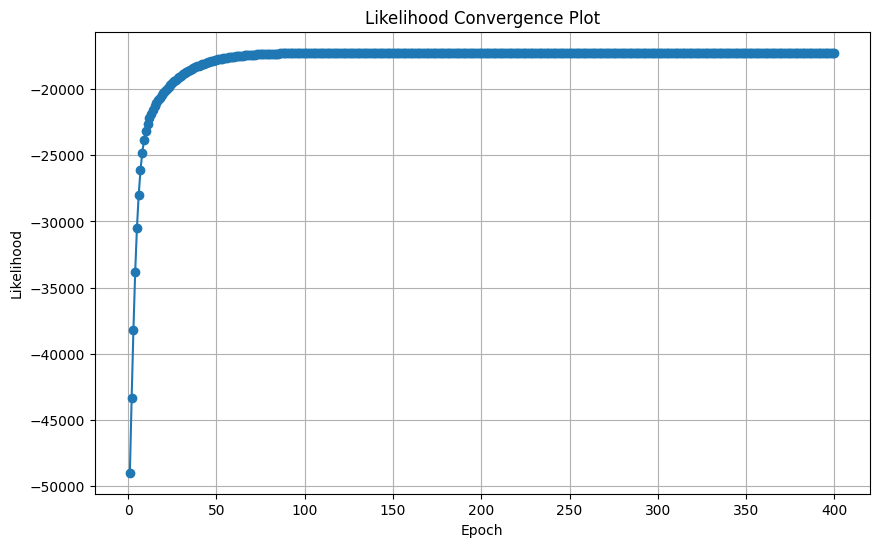

In [18]:
hf.plot_likelihood(training_history)

## Reconstruction

In [19]:
posterior_mean, _, posterior_variance = hf.posterior_moments(y_actual, w_opt, v_opt, mu_opt, omega_opt, sigma2_opt, t)
posterior_mean, posterior_variance

(array([[ 0.85209526, -0.47740588],
        [ 0.82937912, -0.36303793],
        [ 0.52181143,  0.01907487],
        [-0.17056206,  0.33432722],
        [ 0.37882398,  0.31374498],
        [ 0.35642602,  0.32099546],
        [ 0.38742285,  0.09453281],
        [ 0.32877793, -0.07705396],
        [ 1.12713587, -0.34092584],
        [ 1.68276452, -0.89116298],
        [-0.1400598 ,  0.45461629],
        [ 0.59190296, -0.2162752 ],
        [ 0.45245191,  0.25766252],
        [-0.03361146,  0.14847386],
        [ 0.02539407,  0.03490945],
        [ 0.96593519, -0.41465894],
        [ 1.54074549, -0.52771603],
        [ 0.97005369, -0.24104096],
        [ 0.1280291 ,  0.082922  ],
        [ 0.43586686, -0.09665142],
        [-0.03240578,  0.39485401],
        [-0.09684818,  0.56672476],
        [ 0.24069446,  0.03025606],
        [ 1.20330648, -0.82568785],
        [ 0.3745691 ,  0.39324282],
        [-0.49794395,  0.70152   ],
        [ 0.28248835,  0.00748461],
        [ 0.52411024, -0.038

In [20]:
x_recon = np.zeros((n, q))
for i in range(n):
    rnd = np.random.default_rng()
    x_recon[i] = rnd.multivariate_normal(mean=posterior_mean[i], cov=posterior_variance[i])
x_recon

array([[ 8.40914431e-01, -4.62317244e-01],
       [ 8.27801883e-01, -3.62968710e-01],
       [ 5.28854769e-01,  5.30306171e-03],
       [-1.80708460e-01,  3.44354191e-01],
       [ 3.83200664e-01,  3.10727814e-01],
       [ 3.20813503e-01,  3.37890262e-01],
       [ 3.81172482e-01,  9.31017896e-02],
       [ 3.35097537e-01, -8.15972355e-02],
       [ 1.14716488e+00, -3.46324629e-01],
       [ 1.69002435e+00, -8.94604788e-01],
       [-1.45962123e-01,  4.55871729e-01],
       [ 6.06349691e-01, -2.18007998e-01],
       [ 4.46102486e-01,  2.64746875e-01],
       [-4.02046407e-02,  1.47572266e-01],
       [ 1.77164394e-02,  4.22041180e-02],
       [ 9.58196109e-01, -4.09103747e-01],
       [ 1.53207109e+00, -5.18091168e-01],
       [ 9.70129693e-01, -2.41778924e-01],
       [ 1.26180304e-01,  8.77849239e-02],
       [ 4.38859896e-01, -9.69114581e-02],
       [-3.58724547e-02,  3.99262882e-01],
       [-1.07724945e-01,  5.72077096e-01],
       [ 2.41155388e-01,  3.05377322e-02],
       [ 1.

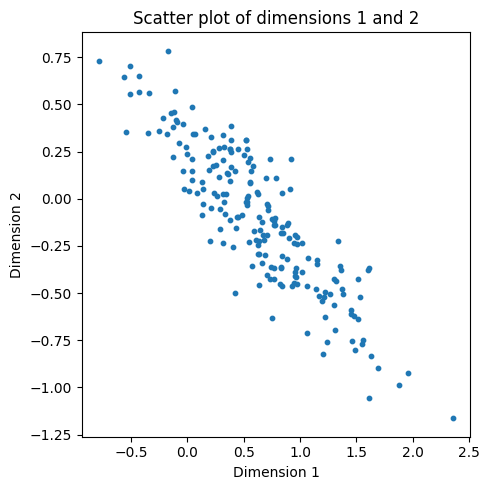

In [31]:
hf.plot_scatter_pairs_latent(x_recon)

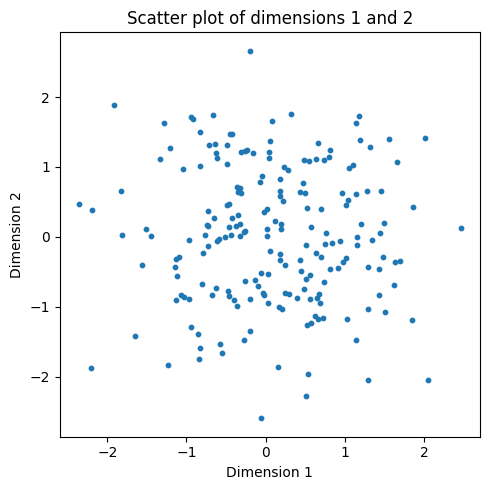

In [30]:
hf.plot_scatter_pairs_latent(x_actual)

In [23]:
y_recon = hf.decode(x_recon, w_opt, v_opt, mu_opt, omega_opt, sigma2_opt, t, seed=None, noise=True)

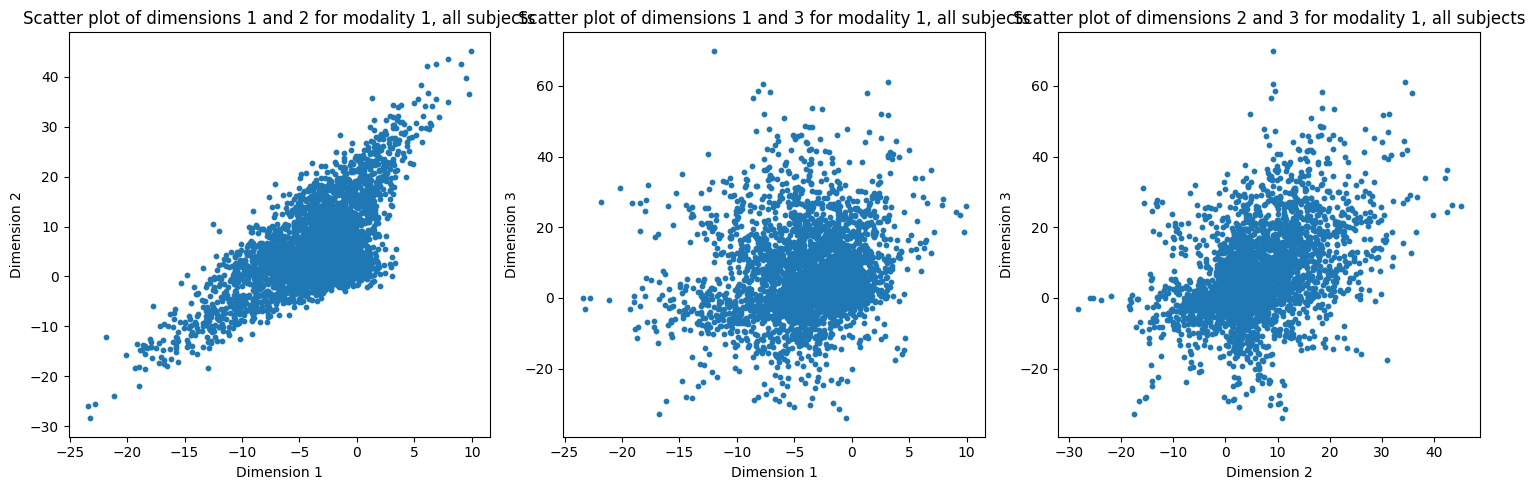

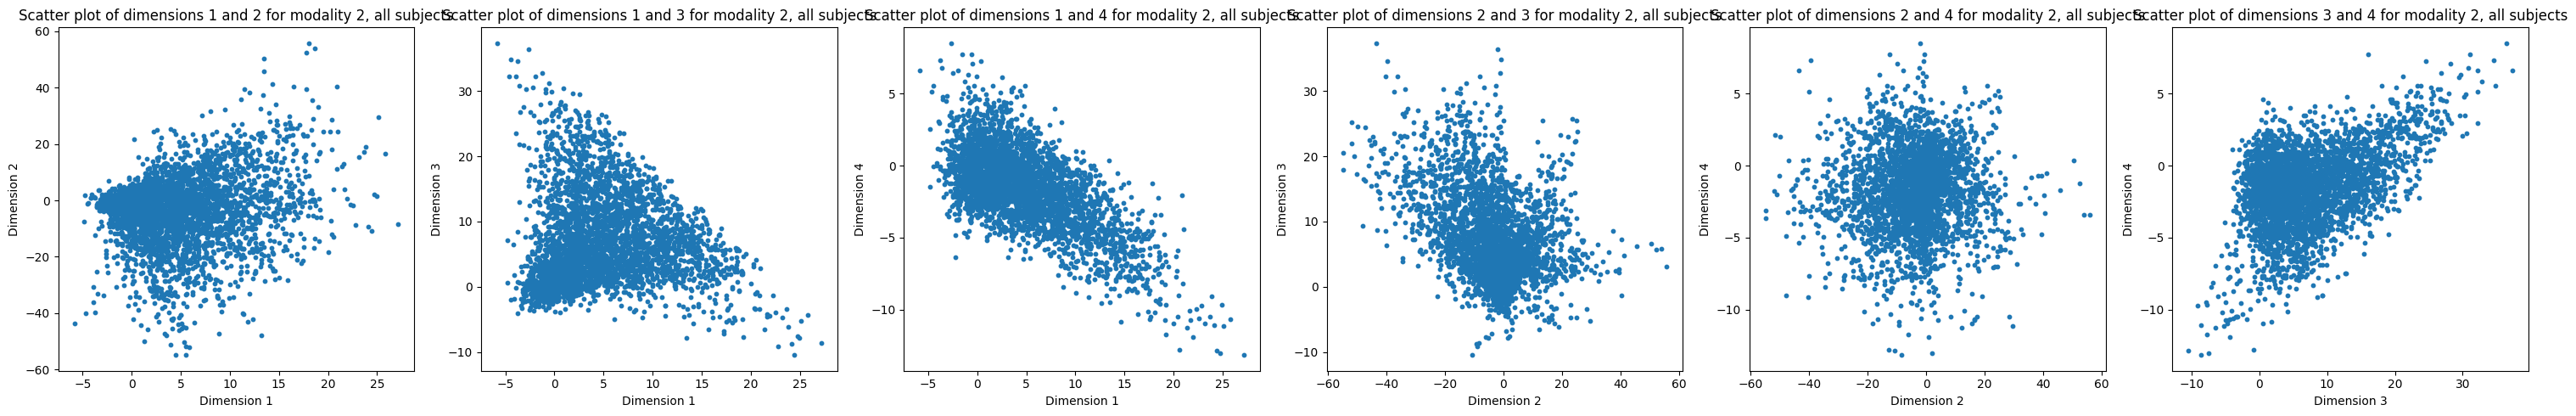

In [24]:
hf.plot_scatter_pairs_observed(y_recon)

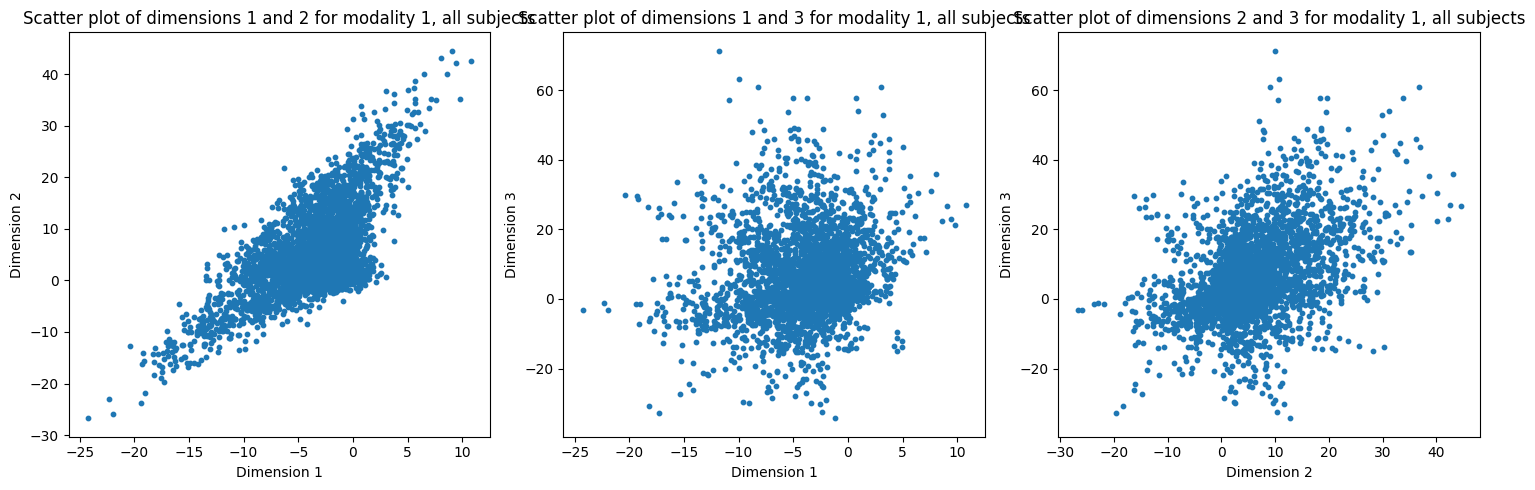

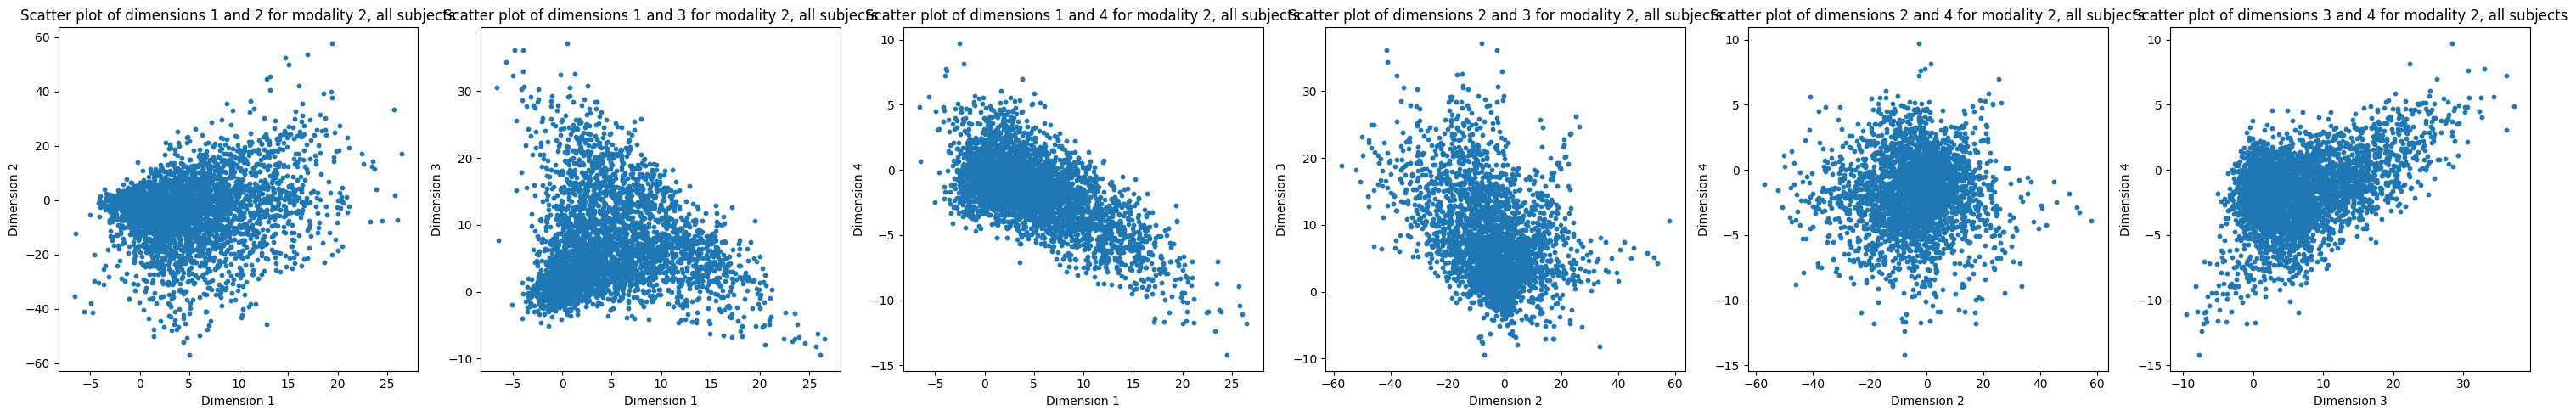

In [25]:
hf.plot_scatter_pairs_observed(y_actual)

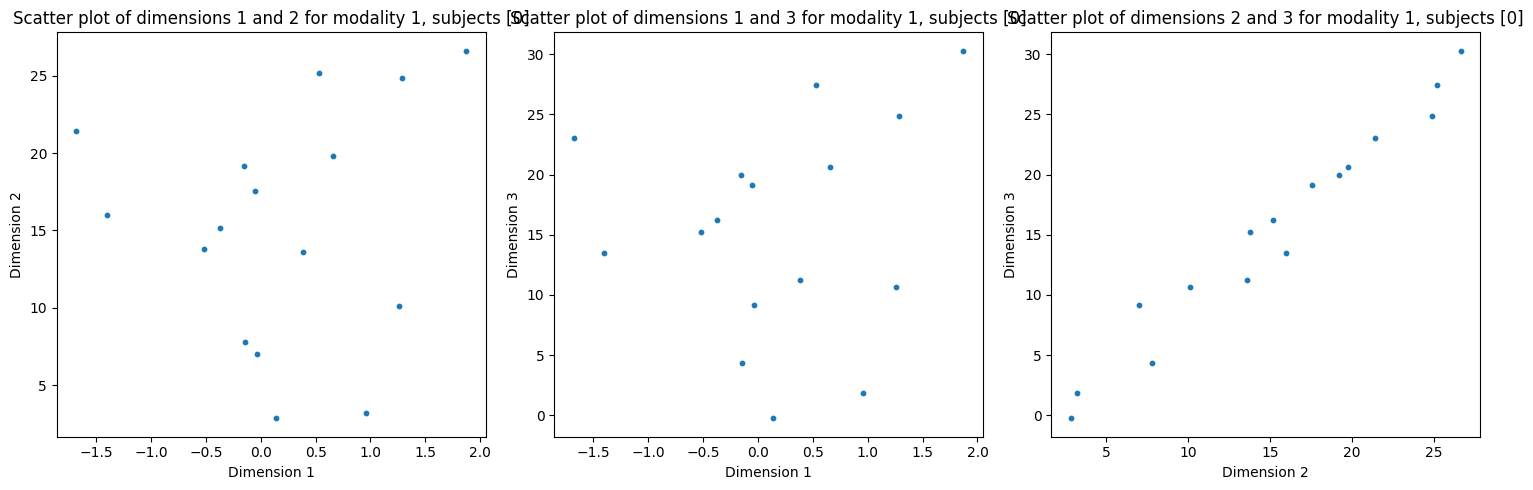

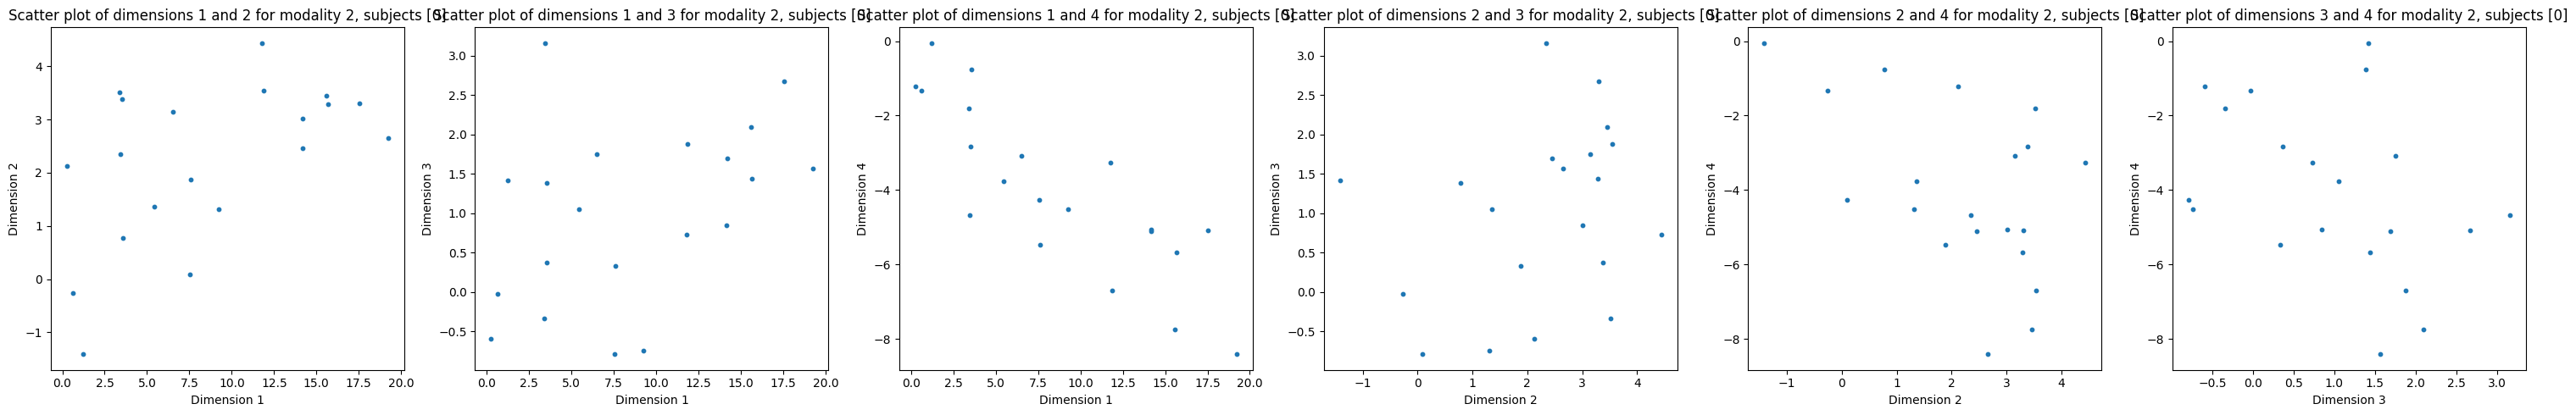

In [26]:
hf.plot_scatter_pairs_observed(y_actual, subject_indices=[0])

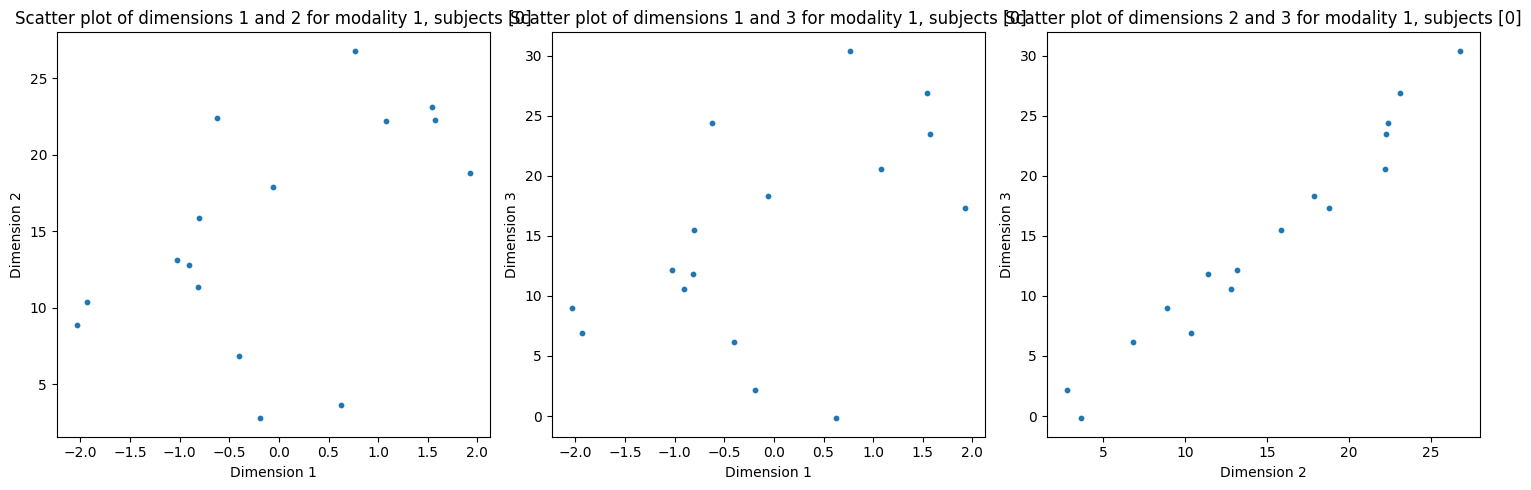

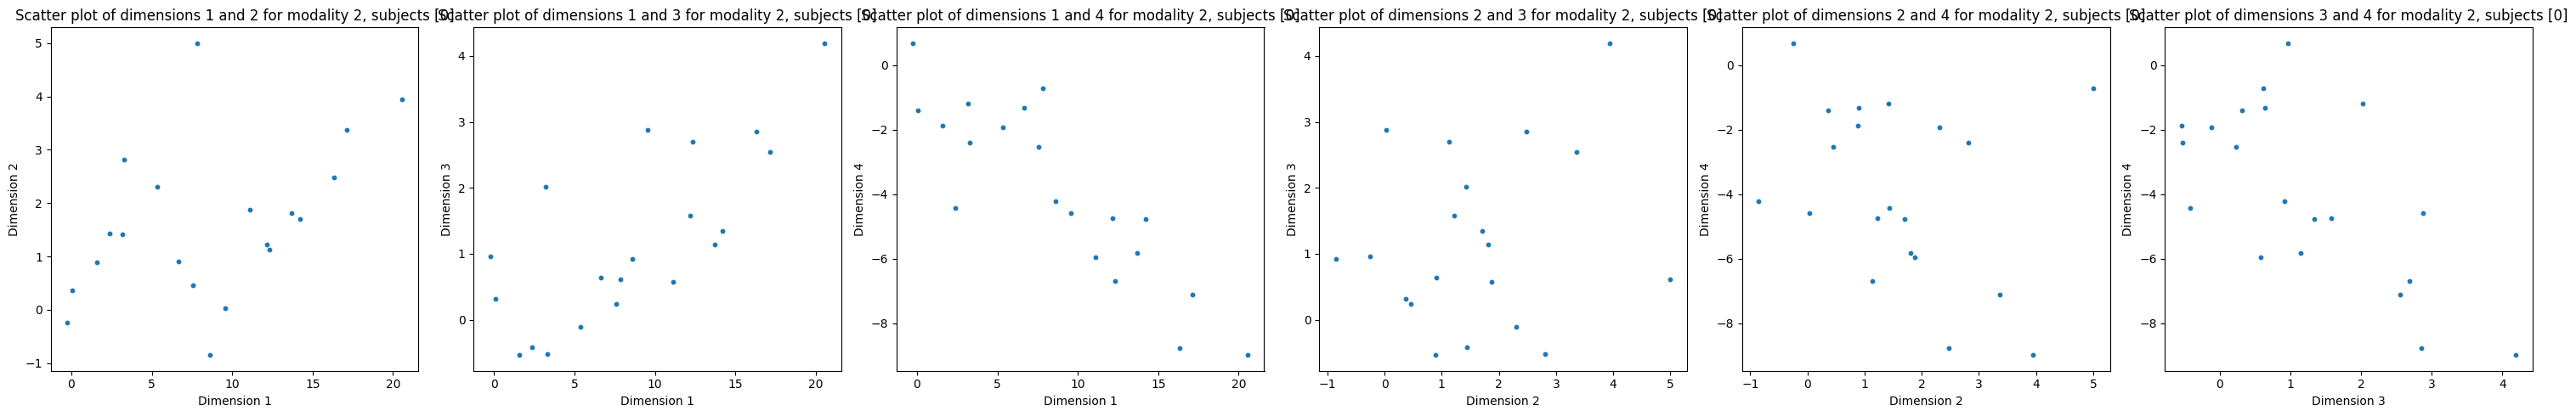

In [27]:
hf.plot_scatter_pairs_observed(y_recon, subject_indices=[0])

In [28]:
y_actual_np = np.array(y_actual, dtype=object)
y_recon_np = np.array(y_recon, dtype=object)

In [29]:
hf.mae(y_actual_np, y_recon_np)

(2.719024358027504, array([1.30310386, 1.41592049]))